In [1]:
import numpy as np
import pandas as pd

import os 
os.chdir(r'C:\Users\nkohli\AI Foundry\Nikhil Scripts')

In [2]:
xls = pd.ExcelFile('OPTIONS.xlsx')
DATA_1016_1 = pd.read_excel(xls, '1016')
DATA_1016 = DATA_1016_1[DATA_1016_1['Type']=='C']
DATA_1016.head()

,Contract Name,Last Trade Date,Strike,Type,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,SPXW191016C02000000,2019-10-14 3:21PM EDT,2000,C,968.17,962.2,967.9,80.62,0.0908,8,18,2.3572
1,SPXW191016C02400000,2019-09-19 3:37PM EDT,2400,C,492.50,563.5,569.2,0.00,-,1,2,1.0479
2,SPXW191016C02425000,2019-09-19 3:37PM EDT,2425,C,583.35,536.9,542.5,0.00,-,-,1,1.2573
3,SPXW191016C02690000,2019-10-14 12:08AM EDT,2690,C,239.91,273.8,279.2,0.00,-,-,3,0.5576
4,SPXW191016C02715000,2019-10-09 2:59PM EDT,2715,C,211.53,248.6,254.2,0.00,-,4,0,0.7201


In [65]:
xls_2 = pd.ExcelFile('OPTIONS.xlsx')
DATA_1018_1 = pd.read_excel(xls_2, '1018')
DATA_1018 = DATA_1018_1[DATA_1018_1['Type']=='C']

xls_3 = pd.ExcelFile('OPTIONS.xlsx')
DATA_1021_1 = pd.read_excel(xls_2, '1021')
DATA_1021 = DATA_1021_1[DATA_1021_1['Type']=='C']

xls_4 = pd.ExcelFile('OPTIONS.xlsx')
DATA_1023_1 = pd.read_excel(xls, '1023')
DATA_1023 = DATA_1023_1[DATA_1023_1['Type']=='C']



In [68]:
#cols = ['Bid','Ask'] 
#DATA_1016['BID_ASK_AVG'] = DATA_1016['Bid']
#DATA_1016[cols].astype(float).mean(axis=1)
#DATA_1016
import warnings
warnings.filterwarnings("ignore")

bid_list = [0 if element == '-' else element for element in DATA_1016['Bid']]
DATA_1016['Bid'] = pd.DataFrame(bid_list)
DATA_1016['BID_ASK_AVG'] = ((DATA_1016['Bid'] + DATA_1016['Ask'])/2)
St = 2966.15

bid_list = [0 if element == '-' else element for element in DATA_1018['Bid']]
DATA_1018['Bid'] = pd.DataFrame(bid_list)
DATA_1018['BID_ASK_AVG'] = ((DATA_1018['Bid'] + DATA_1018['Ask'])/2)

bid_list = [0 if element == '-' else element for element in DATA_1021['Bid']]
DATA_1021['Bid'] = pd.DataFrame(bid_list)
DATA_1021['BID_ASK_AVG'] = ((DATA_1021['Bid'] + DATA_1021['Ask'])/2)

bid_list = [0 if element == '-' else element for element in DATA_1023['Bid']]
DATA_1023['Bid'] = pd.DataFrame(bid_list)
DATA_1023['BID_ASK_AVG'] = ((DATA_1023['Bid'] + DATA_1023['Ask'])/2)


In [69]:
DATA_1016.head()

,Contract Name,Last Trade Date,Strike,Type,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,BID_ASK_AVG
0,SPXW191016C02000000,2019-10-14 3:21PM EDT,2000,C,968.17,962.2,967.9,80.62,0.0908,8,18,2.3572,965.05
1,SPXW191016C02400000,2019-09-19 3:37PM EDT,2400,C,492.50,563.5,569.2,0.00,-,1,2,1.0479,566.35
2,SPXW191016C02425000,2019-09-19 3:37PM EDT,2425,C,583.35,536.9,542.5,0.00,-,-,1,1.2573,539.70
3,SPXW191016C02690000,2019-10-14 12:08AM EDT,2690,C,239.91,273.8,279.2,0.00,-,-,3,0.5576,276.50
4,SPXW191016C02715000,2019-10-09 2:59PM EDT,2715,C,211.53,248.6,254.2,0.00,-,4,0,0.7201,251.40


In [71]:
#working 
def STATE_PRICE_DENSITY(C, STRIKE, St):
    '''
    CONSTRUCT A SPREAD POSITION
    LONG THE CALL AT K1 
    SHORT THE CALL AT K2
    '''
    N = len(C)
    P = np.zeros((N,1))
    for n in range(0, N-1):
        if(n==0):
            P[0] = 1-(St-C[0])/STRIKE[0]
        else:
            P[n] = 1-(C[n]-C[n-1])/(STRIKE[n]-STRIKE[n-1])    

    P[N-1] = 1- sum(P[:-1])
    P = sorted(P)
    #print(len(P))
    #print(C.shape)
    #print(STRIKE.shape)
    
    
    #SPD = (P[1:]-P[0:-1])/(STRIKE[1:]-STRIKE[0:-1])
    SPD = []
    for j in range(1, len(P)):
        state = (P[j]-P[j-1])/(STRIKE[j]-STRIKE[j-1])
        SPD.append(state)
    
    SPD = [0 if x =='NAN' else x for x in SPD]
    SPD = SPD[2:-1]
    #print(SPD)
    return SPD
    #print(len(SPD))

    

In [72]:
SPD_1016 = STATE_PRICE_DENSITY(DATA_1016['BID_ASK_AVG'],DATA_1016['Strike'],St)
SPD_1016

[array([9.43396226e-05]),
 array([0.0002]),
 array([0.001]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.001]),
 array([0.]),
 array([0.]),
 array([0.001]),
 array([0.001]),
 array([0.]),
 array([0.]),
 array([0.002]),
 array([0.003]),
 array([0.]),
 array([0.005]),
 array([0.005]),
 array([0.014]),
 array([0.009]),
 array([0.017]),
 array([0.]),
 array([0.004]),
 array([0.014]),
 array([0.038]),
 array([1.77635684e-16]),
 array([0.004]),
 array([0.016]),
 array([0.004]),
 array([0.002]),
 array([0.008]),
 array([0.012]),
 array([0.004]),
 array([0.004]),
 array([0.002]),
 array([0.002]),
 array([0.002]),
 array([0.002]),
 array([0.008]),
 array([0.004]),
 array([0.001]),
 array([0.007]),
 array([0.001]),
 array([0.001]),
 array([5.32907052e-16

In [73]:
SPD_1016 = STATE_PRICE_DENSITY(DATA_1016['BID_ASK_AVG'],DATA_1016['Strike'],St)

SPD_1018 = STATE_PRICE_DENSITY(DATA_1018['BID_ASK_AVG'],DATA_1018['Strike'],St)

SPD_1021 = STATE_PRICE_DENSITY(DATA_1021['BID_ASK_AVG'],DATA_1021['Strike'],St)

SPD_1023 = STATE_PRICE_DENSITY(DATA_1023['BID_ASK_AVG'],DATA_1023['Strike'],St)


Text(0, 0.5, 'State Price Density')

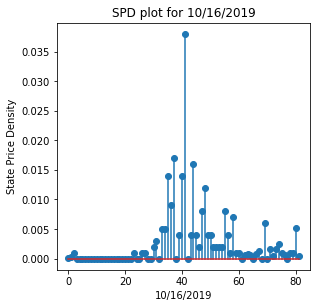

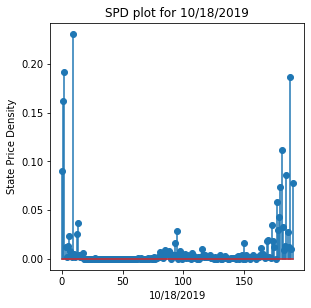

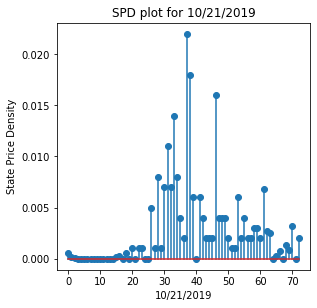

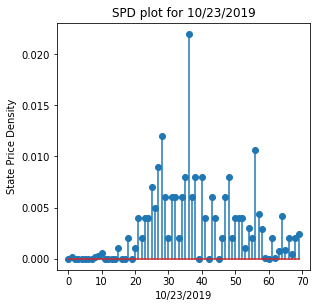

In [76]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

plt.figure(1, figsize=(10,10))
plt.subplot(2,2,1)
plt.stem(SPD_1016)
#plt.xticks(np.floor(len(SPD_1016)/2))
#ax.Axes.set_xticklabels(np.median(DATA_1016['Strike']))
#ax.xticklabels([(np.median(DATA_1016['STRIKE']))])
#ax.Axes.set_xticklabels((np.median(DATA_1016['STRIKE'], '$')))
plt.title('SPD plot for 10/16/2019')
plt.xlabel('10/16/2019')
plt.ylabel('State Price Density')


plt.figure(2, figsize=(10,10))
plt.subplot(2,2,2)
plt.stem(SPD_1018)
plt.title('SPD plot for 10/18/2019')
plt.xlabel('10/18/2019')
plt.ylabel('State Price Density')

plt.figure(3, figsize=(10,10))
plt.subplot(2,2,3)
plt.stem(SPD_1021)
plt.title('SPD plot for 10/21/2019')
plt.xlabel('10/21/2019')
plt.ylabel('State Price Density')

plt.figure(4, figsize=(10,10))
plt.subplot(2,2,1)
plt.stem(SPD_1023)
plt.title('SPD plot for 10/23/2019')
plt.xlabel('10/23/2019')
plt.ylabel('State Price Density')

